<a href="https://colab.research.google.com/github/Mritunjaysri01/Career-Launcher-ML-Intern/blob/master/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset_gold=pd.read_csv('GOLD.csv')

In [19]:
dataset_gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [20]:
dataset_gold.tail()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
511,"May 03, 2019",31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [21]:
dataset_gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [0]:
df=dataset_gold.dropna()

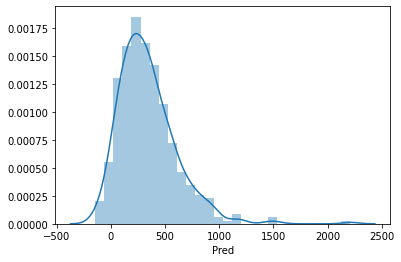

In [24]:
sns.distplot(df['Pred'])

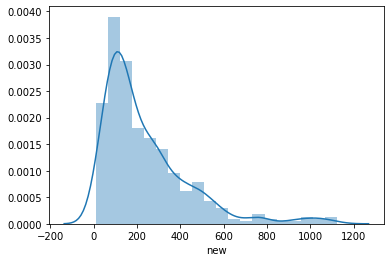

In [25]:
sns.distplot(df['new'])

Multiple Linear Regression on 'Pred' Column

In [0]:
X=df.iloc[:,1:5]
y=df.iloc[:,7]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=regressor.predict(X_test)

In [31]:
# Measuring Accuracy using r2 score
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

1.0

In [0]:
df2=dataset_gold

In [0]:
#Replacing the NaN values in Pred Column
for i in range(len(df2)):
    if np.isnan(df2['Pred'].iloc[i]):
        X1=df2[['Price','Open','High','Low']].iloc[i].values
        df2['Pred'][i]=regressor.predict(X1.reshape(1,-1))

Polynomial Linear Regression on 'New' Column

In [0]:
X=dataset_gold.iloc[:,1:5]
y=dataset_gold.iloc[:,8]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)#Checked for degree 2,3,4
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=lin_reg.predict(poly_reg.fit_transform(X_test))

In [38]:
# Measuring Accuracy using r2 score
metrics.r2_score(y_test, y_pred)

0.9999999892837665

 Query **3.2**

In [0]:
nifty=pd.read_csv('Nifty50.csv')
bajaj=pd.read_csv('BAJAJELEC.csv')

In [0]:
df=nifty[-63:]
X=df['Close'].pct_change()*100
df=bajaj[-63:]
y=df['Close Price'].pct_change()*100
X=X.dropna()
y=y.dropna()

In [0]:
X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

In [42]:
beta=results.params
print('\033[1m' + 'The Daily beta value for past three month is ' + '\033[0m' + str(beta['Close']))

The Daily beta value for past three month is 1.5812125267239854


In [0]:
df=pd.DataFrame()
df['Date']=nifty['Date']
df['Market']=nifty['Close']
df['Stock']=bajaj['Close Price']
df["Date"]=pd.to_datetime(df["Date"])

In [0]:
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year
df2 = df.groupby(['Year', 'Month'])

In [0]:
def total_return(prices):
    return (prices.iloc[0]-prices.iloc[-1]) / prices.iloc[0] * 100

In [0]:
X=df2['Market'].apply(total_return)
y=df2['Stock'].apply(total_return)

In [0]:
X = sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()

In [48]:
beta=results.params
print('\033[1m' + 'The Monthly beta value is ' + '\033[0m' + str(beta['Market']))

The Monthly beta value is 0.830854430107087
